## Reto 5: Limpiando un dataset

### 1. Objetivos:
    - Aplicar todo lo que aprendimos el día de hoy a un dataset real
 
---
    
### 2. Desarrollo:

#### a) Limpieza de datos en el mundo real

Hasta ahora hemos estado realizando ejercicios con datasets dummy (falsos). Ahora vamos a aplicar todo lo que hemos aprendido el día de hoy a un dataset real.

El dataset se encuentra en la carpeta [Datasets](../../Datasets/Readme.md) en la raíz del repositorio. El nombre el dataset es 'melbourne_housing-raw.csv'.

Lee el dataset usando pandas y realiza las siguientes tareas:

1. Ve a este [link](https://www.kaggle.com/anthonypino/melbourne-housing-market) para conocer más sobre el dataset y los datos que contiene.
2. Explora tu dataset para entender su estructura
3. Identifica los `NaNs` en el dataset y dónde se encuentran
4. Elimina los `NaNs` de tu dataset
5. Resetea tu índice para que sea compatible con el nuevo dataset
6. Cambia los nombres de las columnas para que tengan consistencia y no haya errores ortográficos
7. Realiza agregaciones (min, man, mean, etc) de las siguientes filas para conocer mejor la distribución de tus datos:
    a) Price
    b) Distance
    c) Landsize
    
Si tienes dudas en algún momento, por favor pídele a la experta que te oriente. Todas las tareas que hay que realizar ya las hemos hecho en otros retos; puedes ir a revisar esos otros ejercicios para recordar.

¡Mucha suerte!

In [62]:
# data
import pandas as pd
import numpy as np
# graph
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
csvPath = "/home/sergio/Documents/bedu/Procesamiento-de-Datos-con-Python-Santander_2020_2021/Datasets/melbourne_housing-raw.csv"

melbourne_housing_df = pd.read_csv(csvPath)
melbourne_housing_df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.50,3067.00,...,1.00,1.00,126.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
2,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,...,1.00,0.00,156.00,79.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.50,3067.00,...,2.00,1.00,0.00,NaN,NaN,Yarra,-37.81,145.01,Northern Metropolitan,4019.00
4,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,...,2.00,0.00,134.00,150.00,1900.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00


In [56]:
# Identificando nans
nan_values = melbourne_housing_df.isna().sum()
nan_values

Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             8
Postcode             8
Bedroom2          4413
Bathroom          4413
Car               4413
Landsize          4796
BuildingArea     11123
YearBuilt        10389
CouncilArea       4444
Lattitude         4292
Longtitude        4292
Regionname           8
Propertycount        8
dtype: int64

In [57]:
#Eliminando nans
# melbourne_housing_df = melbourne_housing_df.dropna(axis=0)
melbourne_housing_df = melbourne_housing_df.drop(columns=['BuildingArea', 'YearBuilt'])
melbourne_housing_df = melbourne_housing_df.dropna(subset=['Price', 'Landsize', 'Distance', 'Lattitude', 'Longtitude'], axis=0)

In [58]:
# Reseteando índices
melbourne_housing_df = melbourne_housing_df.reset_index(drop=True)
melbourne_housing_df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11644,Whittlesea,30 Sherwin St,3,h,601000.00,S,Ray,29/07/2017,35.50,3757.00,3.00,2.00,2.00,1970.00,Manningham,-37.76,145.10,Northern Victoria,2170.00
11645,Williamstown,87 Pasco St,3,h,1285000.00,S,Jas,29/07/2017,6.80,3016.00,2.00,1.00,1.00,2010.00,Whittlesea,-37.68,145.02,Western Metropolitan,6380.00
11646,Yarraville,2 Adeney St,2,h,750000.00,SP,hockingstuart,29/07/2017,6.30,3013.00,3.00,2.00,2.00,1999.00,Darebin,-37.76,145.00,Western Metropolitan,6543.00
11647,Yarraville,54 Pentland Pde,6,h,2450000.00,VB,Village,29/07/2017,6.30,3013.00,3.00,2.00,1.00,2011.00,Hume,-37.70,144.88,Western Metropolitan,6543.00


In [59]:
# Rename columns 
melbourne_housing_df = melbourne_housing_df.rename(columns={'SellerG': 'Seller','BuildingArea': 'SquareMeters'})
melbourne_housing_df

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.00,S,Biggin,3/12/2016,2.50,3067.00,2.00,1.00,1.00,202.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
1,Abbotsford,25 Bloomburg St,2,h,1035000.00,S,Biggin,4/02/2016,2.50,3067.00,2.00,1.00,0.00,156.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
2,Abbotsford,5 Charles St,3,h,1465000.00,SP,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,0.00,134.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
3,Abbotsford,40 Federation La,3,h,850000.00,PI,Biggin,4/03/2017,2.50,3067.00,3.00,2.00,1.00,94.00,Yarra,-37.80,145.00,Northern Metropolitan,4019.00
4,Abbotsford,55a Park St,4,h,1600000.00,VB,Nelson,4/06/2016,2.50,3067.00,3.00,1.00,2.00,120.00,Yarra,-37.81,144.99,Northern Metropolitan,4019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11644,Whittlesea,30 Sherwin St,3,h,601000.00,S,Ray,29/07/2017,35.50,3757.00,3.00,2.00,2.00,1970.00,Manningham,-37.76,145.10,Northern Victoria,2170.00
11645,Williamstown,87 Pasco St,3,h,1285000.00,S,Jas,29/07/2017,6.80,3016.00,2.00,1.00,1.00,2010.00,Whittlesea,-37.68,145.02,Western Metropolitan,6380.00
11646,Yarraville,2 Adeney St,2,h,750000.00,SP,hockingstuart,29/07/2017,6.30,3013.00,3.00,2.00,2.00,1999.00,Darebin,-37.76,145.00,Western Metropolitan,6543.00
11647,Yarraville,54 Pentland Pde,6,h,2450000.00,VB,Village,29/07/2017,6.30,3013.00,3.00,2.00,1.00,2011.00,Hume,-37.70,144.88,Western Metropolitan,6543.00


In [60]:
#Agrupaciones min, max, mean, median, std, var, count, sum to columns Price, Distance and Landsize
agregations = melbourne_housing_df.agg({'Price': ['min', 'max', 'mean', 'median', 'std', 'var', 'count', 'sum'], 'Distance': ['min', 'max', 'mean', 'median', 'std', 'var', 'count', 'sum'], 'Landsize': ['min', 'max', 'mean', 'median', 'std', 'var', 'count', 'sum']})
# show agregations
agregations

,Price,Distance,Landsize
min,85000.00,0.00,0.00
max,9000000.00,47.40,76000.00
mean,1068148.81,9.58,554.44
median,895500.00,9.10,412.00
std,643661.94,5.30,1460.25
var,414300695608.63,28.14,2132322.98
count,11649.00,11649.00,11649.00
sum,12442865510.00,111649.30,6458651.00


In [61]:
# Round agregations to 2 decimals
agregations = agregations.round(2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
agregations

,Price,Distance,Landsize
min,85000.00,0.00,0.00
max,9000000.00,47.40,76000.00
mean,1068148.81,9.58,554.44
median,895500.00,9.10,412.00
std,643661.94,5.30,1460.25
var,414300695608.63,28.14,2132322.98
count,11649.00,11649.00,11649.00
sum,12442865510.00,111649.30,6458651.00


/tmp/ipykernel_81903/1761635540.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(melbourne_housing_df['Price'])


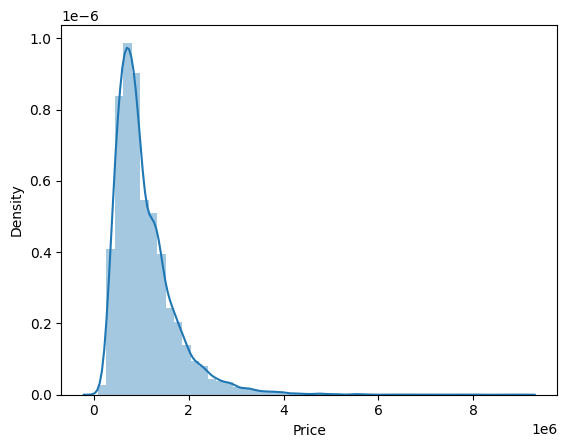

/tmp/ipykernel_81903/1761635540.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(melbourne_housing_df['Distance'])


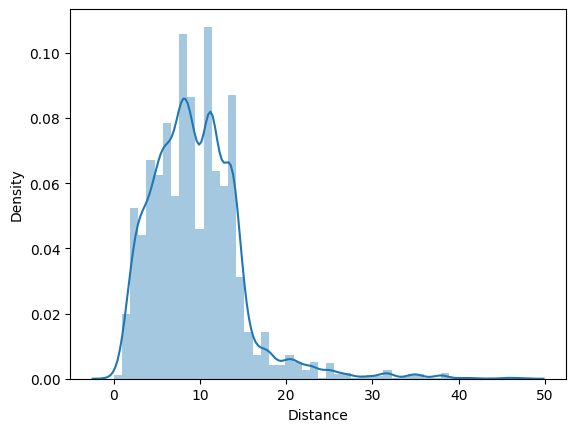

/tmp/ipykernel_81903/1761635540.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(melbourne_housing_df['Landsize'])


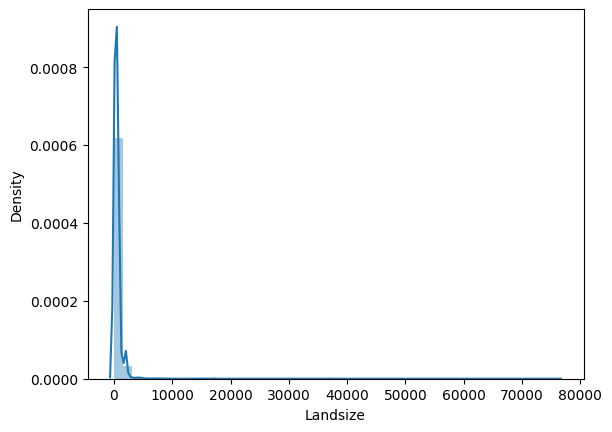

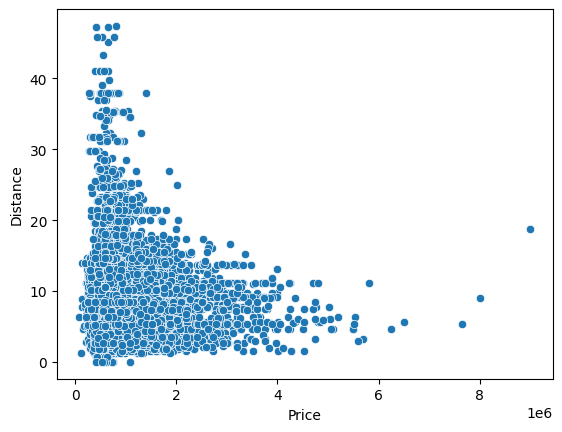

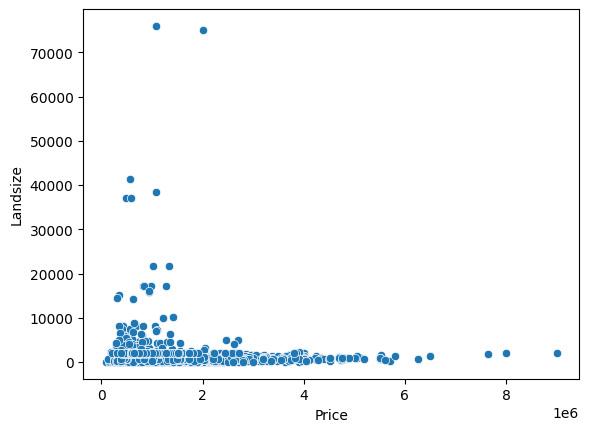

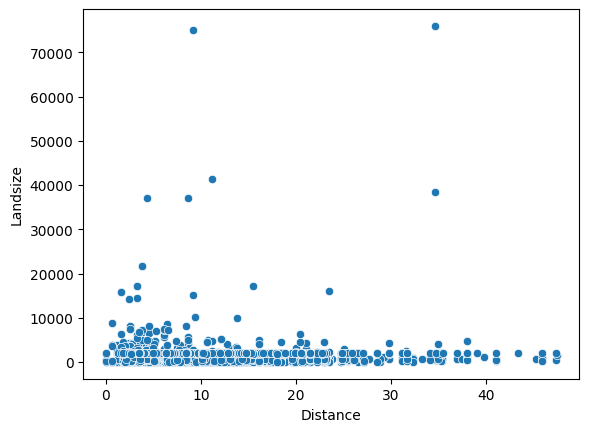

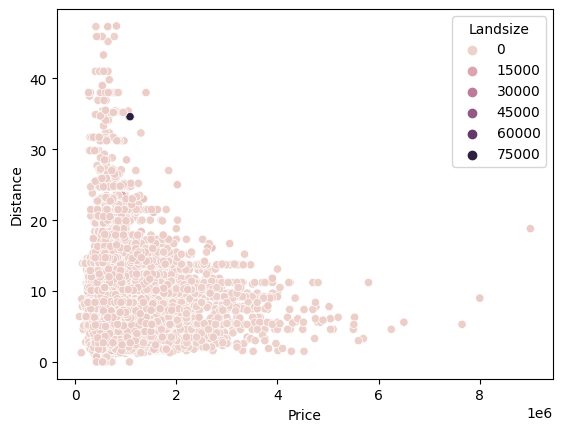

In [64]:
#Graphs
# Price
sns.distplot(melbourne_housing_df['Price'])
plt.show()

# Distance
sns.distplot(melbourne_housing_df['Distance'])
plt.show()

# Landsize
sns.distplot(melbourne_housing_df['Landsize'])
plt.show()

# Price vs Distance
sns.scatterplot(x='Price', y='Distance', data=melbourne_housing_df)
plt.show()

# Price vs Landsize
sns.scatterplot(x='Price', y='Landsize', data=melbourne_housing_df)
plt.show()

# Distance vs Landsize
sns.scatterplot(x='Distance', y='Landsize', data=melbourne_housing_df)
plt.show()

# Price vs Distance vs Landsize
sns.scatterplot(x='Price', y='Distance', hue='Landsize', data=melbourne_housing_df)
plt.show()
